In [115]:
# Import all the required libraries
import pandas as pd
import pandas_datareader
from pandas_datareader import data
import datetime
import yfinance as yf
from path import Path


In [116]:
# set the tickers
tickers = ["BMO.TO", "TRI.TO"]

# extract data from 01/01/2019 to 03/03/2022.
start_date = datetime.date(2019,1,1)
end_date = datetime.date(2022,3,3)

In [117]:
# Use data.DataReader to load the data
panel_data = data.DataReader(tickers, "yahoo", start_date, end_date)

# Checkout the data type
type(panel_data)

pandas.core.frame.DataFrame

In [118]:
# checkout the data
panel_data

Attributes   Adj Close                   Close                    High  \
Symbols         BMO.TO      TRI.TO      BMO.TO      TRI.TO      BMO.TO   
Date                                                                     
2019-01-02   78.031769   61.395039   89.559998   64.599998   89.559998   
2019-01-03   77.317314   60.093010   88.739998   63.230000   89.430000   
2019-01-04   78.545822   60.558701   90.150002   63.720001   90.290001   
2019-01-07   78.354134   60.007481   89.930000   63.139999   90.410004   
2019-01-08   79.051163   60.054993   90.730003   63.189999   90.750000   
...                ...         ...         ...         ...         ...   
2022-02-25  145.270004  128.440002  145.270004  128.440002  146.399994   
2022-02-28  144.729996  128.160004  144.729996  128.160004  144.759995   
2022-03-01  144.669998  129.940002  144.669998  129.940002  147.649994   
2022-03-02  147.639999  131.190002  147.639999  131.190002  148.850006   
2022-03-03  147.779999  132.139999  147.779999  132.139999  148.729996   

Attributes                     Low                    Open              \
Symbols         TRI.TO      BMO.TO      TRI.TO      BMO.TO      TRI.TO   
Date                                                                     
2019-01-02   65.730003   87.910004   64.250000   88.580002   65.730003   
2019-01-03   64.599998   88.279999   63.139999   89.379997   64.389999   
2019-01-04   64.050003   89.129997   63.419998   89.680000   63.599998   
2019-01-07   63.709999   88.919998   62.919998   90.410004   63.680000   
2019-01-08   64.139999   89.529999   62.950001   90.500000   63.439999   
...                ...         ...         ...         ...         ...   
2022-02-25  129.210007  143.259995  127.110001  143.600006  129.009995   
2022-02-28  128.360001  142.850006  126.620003  143.289993  127.610001   
2022-03-01  130.229996  143.229996  128.039993  146.479996  128.100006   
2022-03-02  131.690002  145.550003  129.250000  146.070007  130.179993   
2022-03-03  133.009995  147.110001  130.960007  148.270004  131.839996   

Attributes     Volume             
Symbols        BMO.TO     TRI.TO  
Date                              
2019-01-02  1702600.0  1058300.0  
2019-01-03  1103200.0   870000.0  
2019-01-04  1239200.0   791600.0  
2019-01-07  2532100.0   854000.0  
2019-01-08  1905900.0  1162800.0  
...               ...        ...  
2022-02-25  1866000.0   288000.0  
2022-02-28  2571000.0   716100.0  
2022-03-01  2483500.0   389300.0  
2022-03-02  1767100.0   391300.0  
2022-03-03  1767100.0   331800.0  

[796 rows x 12 columns]

In [119]:
# filter the data for closing price and volume
closeprice_and_volume = panel_data[["Close", "Volume"]]
closeprice_and_volume.head()

Attributes      Close                Volume           
Symbols        BMO.TO     TRI.TO     BMO.TO     TRI.TO
Date                                                  
2019-01-02  89.559998  64.599998  1702600.0  1058300.0
2019-01-03  88.739998  63.230000  1103200.0   870000.0
2019-01-04  90.150002  63.720001  1239200.0   791600.0
2019-01-07  89.930000  63.139999  2532100.0   854000.0
2019-01-08  90.730003  63.189999  1905900.0  1162800.0

In [120]:
# get info about the data
closeprice_and_volume.describe()

Attributes       Close                    Volume              
Symbols         BMO.TO      TRI.TO        BMO.TO        TRI.TO
count       796.000000  796.000000  7.960000e+02  7.960000e+02
mean        103.322965  105.435364  2.373227e+06  4.807487e+05
std          21.494046   22.465576  1.470438e+06  2.905946e+05
min          56.240002   63.139999  2.157000e+05  4.660000e+04
25%          92.329998   89.377499  1.333775e+06  3.074750e+05
50%         100.349998  101.789997  1.883300e+06  4.041500e+05
75%         121.639997  116.510002  3.045475e+06  5.661500e+05
max         151.610001  156.009995  1.160970e+07  3.020100e+06

In [121]:
# Check the data type 
closeprice_and_volume.dtypes

Attributes  Symbols
Close       BMO.TO     float64
            TRI.TO     float64
Volume      BMO.TO     float64
            TRI.TO     float64
dtype: object

In [122]:
# Identify frequency of values
closeprice_and_volume.value_counts()

(Close, BMO.TO)  (Close, TRI.TO)  (Volume, BMO.TO)  (Volume, TRI.TO)
56.240002        76.459999        5328000.0         964900.0            1
104.629997       87.480003        1701600.0         779500.0            1
105.190002       79.800003        1402200.0         408900.0            1
105.339996       82.000000        1841600.0         473300.0            1
105.370003       80.540001        1255300.0         651200.0            1
                                                                       ..
96.919998        88.839996        985400.0          258700.0            1
96.949997        70.639999        1021100.0         537700.0            1
96.970001        87.900002        1827800.0         285200.0            1
96.980003        69.970001        1078500.0         334000.0            1
151.610001       132.679993       2258000.0         561200.0            1
Length: 796, dtype: int64

In [123]:
# Check for null values
closeprice_and_volume.isnull().sum()

Attributes  Symbols
Close       BMO.TO     0
            TRI.TO     0
Volume      BMO.TO     0
            TRI.TO     0
dtype: int64

In [124]:
# Check for duplicated values
closeprice_and_volume.duplicated().sum()

0

In [125]:
# Assign closing price to a separate dataframe
close_price = closeprice_and_volume[["Close"]]
close_price.head()

Attributes      Close           
Symbols        BMO.TO     TRI.TO
Date                            
2019-01-02  89.559998  64.599998
2019-01-03  88.739998  63.230000
2019-01-04  90.150002  63.720001
2019-01-07  89.930000  63.139999
2019-01-08  90.730003  63.189999

<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

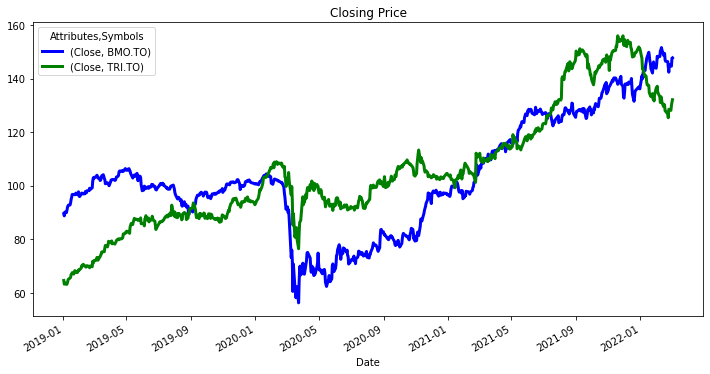

In [126]:
# Closing price data visualization
close_price.plot(title = "Closing Price", color=('blue','green'), linewidth=3, figsize=(12,6))

In [127]:
# Assign volume to a separate dataframe
volume = closeprice_and_volume[["Volume"]]
volume.head()

Attributes     Volume           
Symbols        BMO.TO     TRI.TO
Date                            
2019-01-02  1702600.0  1058300.0
2019-01-03  1103200.0   870000.0
2019-01-04  1239200.0   791600.0
2019-01-07  2532100.0   854000.0
2019-01-08  1905900.0  1162800.0

<AxesSubplot:title={'center':'Volume'}, xlabel='Date'>

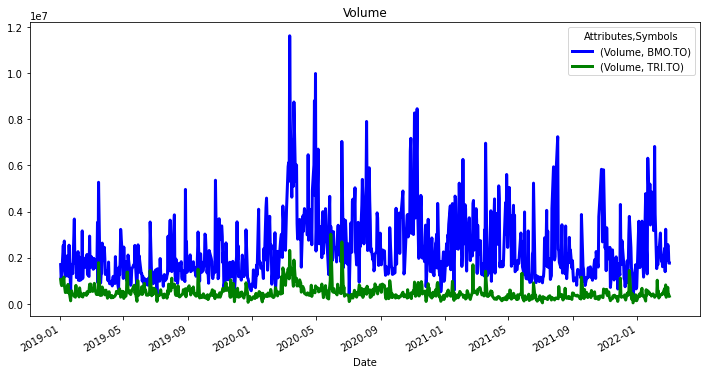

In [128]:
# Volume data visualization
volume.plot(title = "Volume" ,color=('blue','green'), linewidth=3, figsize=(12,6))

In [129]:
closeprice_and_volume.to_csv('stocks_data_1.csv', sep='\t', encoding='utf-8', float_format='%.2f')

In [100]:
# Having fun with yfinance

bmo = yf.Ticker("BMO.TO")
tri = yf.Ticker("TRI.TO")

In [101]:
bmo.info

{'zip': 'H2Y 1L6',
 'sector': 'Financial Services',
 'fullTimeEmployees': 43863,
 'longBusinessSummary': "Bank of Montreal provides diversified financial services primarily in North America. The company's personal banking products and services include checking and savings accounts, credit cards, mortgages, and financial and investment advice services; and commercial banking products and services comprise business deposit accounts, commercial credit cards, business loans and commercial mortgages, cash management solutions, foreign exchange, specialized banking programs, treasury and payment solutions, and risk management products for small business and commercial banking customers. It also offers investment and wealth advisory services; digital investing services; financial services and solutions; and investment management, and trust and custody services. In addition, the company provides life insurance, accident and sickness insurance, and annuity products; creditor and travel insuranc

In [102]:
tri.info

{'zip': 'M5H 2R2',
 'sector': 'Industrials',
 'longBusinessSummary': 'Thomson Reuters Corporation provides business information services in the Americas, Europe, the Middle East, Africa, and the Asia Pacific. It operates in five segments: Legal Professionals, Corporates, Tax & Accounting Professionals, Reuters News, and Global Print. The Legal Professionals segment offers research and workflow products focusing on legal research and integrated legal workflow solutions that combine content, tools, and analytics to law firms and governments. The Corporates segment provides a suite of content-enabled technology solutions for legal, tax, regulatory, compliance, and IT professionals. The Tax & Accounting Professionals segment offers research and workflow products focusing on tax offerings and automating tax workflows to tax, accounting, and audit professionals in accounting firms. The Reuters News segment provides business, financial, national, and international news to professionals throug

In [103]:
bmo_hist = bmo.history(period="max")
bmo_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-12,4.287303,4.287303,4.221822,4.221822,793000,0.0,0.0
1995-01-13,4.307981,4.307981,4.201143,4.287303,2266600,0.0,0.0
1995-01-16,4.330382,4.394141,4.330382,4.394141,1591400,0.0,0.0
1995-01-17,4.351062,4.373463,4.287304,4.351062,900600,0.0,0.0
1995-01-18,4.351062,4.373464,4.307982,4.373464,898600,0.0,0.0


In [104]:
tri_hist = tri.history(period="max")
tri_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-06-04,23.225980,23.944573,22.937258,23.546780,1380280,0.0,0.0
2008-06-05,23.739266,23.829090,23.424881,23.508289,814114,0.0,0.0
2008-06-06,23.482614,23.482614,23.052742,23.225975,1389269,0.0,0.0
2008-06-09,23.129739,23.335052,22.712698,22.808939,759912,0.0,0.0
2008-06-10,22.841015,23.059158,22.622869,22.962919,963463,0.0,0.0


In [105]:
bmo.actions

,Dividends,Stock Splits
Date,,
1995-02-02,0.165,0.0
1995-05-03,0.165,0.0
1995-08-03,0.165,0.0
1995-11-06,0.165,0.0
1996-02-06,0.180,0.0
...,...,...
2021-01-29,1.060,0.0
2021-04-30,1.060,0.0
2021-07-30,1.060,0.0


In [106]:
tri.actions

,Dividends,Stock Splits
Date,,
2008-11-19,0.292984,0.0000
2009-05-20,0.385505,0.0000
2009-08-19,0.385505,0.0000
2009-11-18,0.385505,0.0000
2010-03-04,0.337042,0.0000
2010-05-18,0.337042,0.0000
2010-08-17,0.337042,0.0000
2010-11-16,0.337042,0.0000
2011-02-17,0.339244,0.0000


In [107]:
bmo.financials

,2021-10-31,2020-10-31,2019-10-31,2018-10-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,10258000000.0,6348000000.0,7272000000.0,7414000000.0
Minority Interest,None,None,None,None
Net Income,7754000000.0,5097000000.0,5758000000.0,5453000000.0
Selling General Administrative,12929000000.0,12334000000.0,12287000000.0,11549000000.0
Gross Profit,27059000000.0,22233000000.0,24611000000.0,22243000000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,11692000000.0,6981000000.0,8322000000.0,7917000000.0
Other Operating Expenses,2438000000.0,2918000000.0,4002000000.0,2777000000.0


In [108]:
tri.financials

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,7294000000.0,1220000000.0,372000000.0,300000000.0
Minority Interest,None,None,None,None
Net Income,5689000000.0,1122000000.0,1564000000.0,3933000000.0
Selling General Administrative,NaN,76000000.0,97000000.0,146000000.0
Gross Profit,1978000000.0,2040000000.0,1682000000.0,1624000000.0
Ebit,1208000000.0,1172000000.0,868000000.0,859000000.0
Operating Income,1208000000.0,1172000000.0,868000000.0,859000000.0
Other Operating Expenses,None,None,None,None


In [109]:
bmo.balance_sheet

,2021-10-31,2020-10-31,2019-10-31,2018-10-31
Intangible Assets,2.266000e+09,2.442000e+09,2.424000e+09,2.272000e+09
Capital Surplus,3.130000e+08,3.020000e+08,3.030000e+08,3.000000e+08
Total Liab,9.306520e+11,8.926680e+11,8.011190e+11,7.275720e+11
Total Stockholder Equity,5.387300e+10,5.190300e+10,4.638600e+10,4.138100e+10
Other Current Liab,5.344200e+10,5.010200e+10,5.502900e+10,5.290500e+10
Total Assets,9.881750e+11,9.492610e+11,8.521950e+11,7.732930e+11
Common Stock,1.359900e+10,1.343000e+10,1.297100e+10,1.292900e+10
Other Current Assets,2.530900e+10,2.686200e+10,3.268400e+10,2.532300e+10
Retained Earnings,3.549700e+10,3.074500e+10,2.872500e+10,2.585000e+10
Other Liab,4.837000e+09,4.777000e+09,1.165200e+10,1.247100e+10


In [110]:
tri.balance_sheet

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Intangible Assets,4.153000e+09,4.257000e+09,4.418000e+09,4.232000e+09
Total Liab,8.315000e+09,7.901000e+09,7.735000e+09,7.808000e+09
Total Stockholder Equity,1.383400e+10,9.870000e+09,9.450000e+09,9.100000e+09
Other Current Liab,2.581000e+09,1.545000e+09,1.444000e+09,1.471000e+09
Total Assets,2.214900e+10,1.788100e+10,1.729500e+10,1.701800e+10
Common Stock,5.496000e+09,3.609000e+09,3.466000e+09,3.333000e+09
Retained Earnings,9.149000e+09,5.211000e+09,4.965000e+09,4.739000e+09
Other Liab,1.948000e+09,1.254000e+09,1.587000e+09,1.828000e+09
Good Will,5.940000e+09,5.976000e+09,5.853000e+09,5.076000e+09
Treasury Stock,-8.110000e+08,-6.890000e+08,-7.820000e+08,-8.770000e+08


In [111]:
bmo.news

[{'uuid': '40caea63-7994-3d15-8439-208c13ee4084',
  'title': 'NB Private Equity: Director/PDMR Shareholding',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/nb-private-equity-director-pdmr-205600372.html',
  'providerPublishTime': 1646600160,
  'type': 'STORY'},
 {'uuid': '4fd5568e-47bf-315f-96f0-862481ded460',
  'title': 'Can Sports Betting Upstarts Challenge Caesars, MGM, DraftKings?',
  'publisher': 'TheStreet.com',
  'link': 'https://finance.yahoo.com/m/4fd5568e-47bf-315f-96f0-862481ded460/can-sports-betting-upstarts.html',
  'providerPublishTime': 1646600160,
  'type': 'STORY'},
 {'uuid': '56d39bdb-1f58-346c-b408-c3aab19cdbad',
  'title': 'Putin’s Ruble Workaround Still Leaves Bond Payments in Doubt',
  'publisher': 'Bloomberg',
  'link': 'https://finance.yahoo.com/news/putin-seeks-avert-defaults-ruble-230118728.html',
  'providerPublishTime': 1646599724,
  'type': 'STORY'},
 {'uuid': '8cbf5027-03bc-3334-acdb-5e0226bf495e',
  'title': 'U.S. gasoline pric

In [112]:
tri.news

[{'uuid': '40caea63-7994-3d15-8439-208c13ee4084',
  'title': 'NB Private Equity: Director/PDMR Shareholding',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/nb-private-equity-director-pdmr-205600372.html',
  'providerPublishTime': 1646600160,
  'type': 'STORY'},
 {'uuid': '4fd5568e-47bf-315f-96f0-862481ded460',
  'title': 'Can Sports Betting Upstarts Challenge Caesars, MGM, DraftKings?',
  'publisher': 'TheStreet.com',
  'link': 'https://finance.yahoo.com/m/4fd5568e-47bf-315f-96f0-862481ded460/can-sports-betting-upstarts.html',
  'providerPublishTime': 1646600160,
  'type': 'STORY'},
 {'uuid': '56d39bdb-1f58-346c-b408-c3aab19cdbad',
  'title': 'Putin’s Ruble Workaround Still Leaves Bond Payments in Doubt',
  'publisher': 'Bloomberg',
  'link': 'https://finance.yahoo.com/news/putin-seeks-avert-defaults-ruble-230118728.html',
  'providerPublishTime': 1646599724,
  'type': 'STORY'},
 {'uuid': '8cbf5027-03bc-3334-acdb-5e0226bf495e',
  'title': 'U.S. gasoline pric

In [113]:
bmo.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-23 06:01:00,Credit Suisse,Outperform,,up
2012-08-07 13:32:00,Barclays,Underweight,Equal-Weight,down
2012-08-28 07:48:00,Stifel Nicolaus,Hold,,init
2012-08-29 07:43:00,Desjardins,Buy,Hold,up
2012-08-29 08:03:00,BMO Capital,Market Perform,,main
2013-02-11 12:09:40,Barclays,Underweight,,main
2013-02-27 07:38:06,BMO Capital,Market Perform,,main
2013-02-27 08:24:30,Citigroup,Buy,,init
2013-05-14 11:52:25,Morgan Stanley,Underweight,Equal-Weight,down


In [114]:
tri.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2020-11-04 15:32:06,ScotiaBank,Sector Perform,,main
2020-11-25 09:36:35,Barclays,Equal-Weight,,main
2020-11-25 09:36:35,Jefferies,Hold,,init
2020-11-25 09:36:35,Credit Suisse,Outperform,,main
2020-11-25 09:36:35,Deutsche Bank,Hold,,main
...,...,...,...,...
2021-02-24 13:52:53,Morgan Stanley,Equal-Weight,,main
2021-02-24 15:14:21,ScotiaBank,Sector Perform,,main
2021-03-17 11:40:01,Morgan Stanley,Equal-Weight,,main
